# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [70]:
import pandas as pd
df = pd.read_csv('nutrition.csv')
df

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0 kcal,26.83 g,0.0 g,1.8 g,61.0 mg,0.0 g,68.81 g,NaN,0.0 mg
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0 kcal,22.95 g,0.0 g,1.45 g,55.0 mg,0.0 g,74.38 g,NaN,0.0 mg
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0 kcal,30.19 g,0.0 g,1.9 g,73.0 mg,0.0 g,66.28 g,NaN,0.0 mg
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0 kcal,20.6 g,0.0 g,2.31 g,57.0 mg,0.0 g,75.84 g,NaN,0.0 mg


## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

# Importing Libraries

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

## Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

In [72]:
# selecting fruit category
fruits = df[df['Category'].str.contains("Fruit")]
fruits

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
4992,167746,"Lemons, raw, without peel",Fruits and Fruit Juices,29.0 kcal,1.1 g,9.32 g,0.3 g,0.0 mg,2.8 g,88.98 g,0.0 g,53.0 mg
4993,167747,"Lemon juice, raw",Fruits and Fruit Juices,22.0 kcal,0.35 g,6.9 g,0.24 g,0.0 mg,0.3 g,92.31 g,0.0 g,38.7 mg
4994,167748,"Lemon juice from concentrate, canned or bottled",Fruits and Fruit Juices,17.0 kcal,0.45 g,5.62 g,0.07 g,0.0 mg,0.7 g,93.64 g,0.0 g,14.3 mg
4995,167749,"Lemon peel, raw",Fruits and Fruit Juices,47.0 kcal,1.5 g,16.0 g,0.3 g,0.0 mg,10.6 g,81.6 g,0.0 g,129.0 mg
4996,167750,"Prickly pears, raw",Fruits and Fruit Juices,41.0 kcal,0.73 g,9.57 g,0.51 g,0.0 mg,3.6 g,87.55 g,0.0 g,14.0 mg
...,...,...,...,...,...,...,...,...,...,...,...,...
5342,174683,"Grapes, red or green (European type, such as T...",Fruits and Fruit Juices,69.0 kcal,0.72 g,18.1 g,0.16 g,0.0 mg,0.9 g,80.54 g,0.0 g,3.2 mg
5343,174684,"Grapes, canned, thompson seedless, water pack,...",Fruits and Fruit Juices,40.0 kcal,0.5 g,10.3 g,0.11 g,0.0 mg,0.6 g,88.84 g,0.0 g,1.0 mg
5344,174685,"Grapes, canned, thompson seedless, heavy syrup...",Fruits and Fruit Juices,76.0 kcal,0.48 g,19.65 g,0.1 g,0.0 mg,0.6 g,79.53 g,0.0 g,1.0 mg
5345,174686,"Guava sauce, cooked",Fruits and Fruit Juices,36.0 kcal,0.32 g,9.48 g,0.14 g,0.0 mg,3.6 g,89.56 g,0.0 g,146.4 mg


In [73]:
fruits['Vitamin C'].sort_values(ascending=False)

5155    94.2 mg
5060    92.7 mg
5035    92.5 mg
5245     9.7 mg
5236     9.5 mg
         ...   
5107        NaN
5108        NaN
5109        NaN
5110        NaN
5111        NaN
Name: Vitamin C, Length: 355, dtype: object

In [74]:
df.iloc[5155]

FDC_ID                                      169116
Item            Peaches, frozen, sliced, sweetened
Category                   Fruits and Fruit Juices
Calories                                 94.0 kcal
Protein                                     0.63 g
Carbohydrate                               23.98 g
Total fat                                   0.13 g
Cholesterol                                 0.0 mg
Fiber                                        1.8 g
Water                                      74.73 g
Alcohol                                      0.0 g
Vitamin C                                  94.2 mg
Name: 5155, dtype: object

## **PEACHES ARE THE FRUIT WITH THE MOST VITAMIN C**

## 2. Describe the relationship between the calories and water content of a food item.

In [75]:
df['Calories'].isna().sum()

0

In [76]:
df['Water'].isna().sum()

0

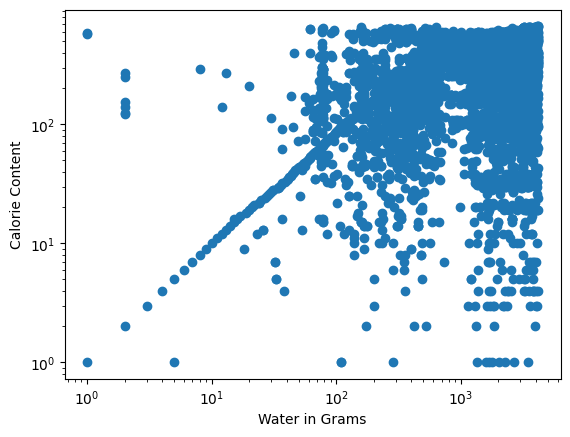

<Figure size 2000x1400 with 0 Axes>

In [77]:
plt.scatter(df['Water'],df['Calories'])
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Water in Grams")
plt.ylabel("Calorie Content")
plt.figure(figsize=(20,14))
plt.show()

## **USUALLY THE MORE WATER IN A FOOD, THE MORE CALORIES IT WILL HAVE**

## 3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?


### Zero-carb diet

In [78]:
df_no_carbs = df[df['Carbohydrate'] == '0.0 g']
df_no_carbs.drop(['Item','FDC_ID','Category'],axis=1,inplace=True)
df_no_carbs

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
472,0.0 kcal,0.0 g,0.0 g,0.0 g,0.0 mg,0.0 g,0.2 g,0.0 g,0.0 mg
551,544.0 kcal,61.3 g,0.0 g,31.3 g,95.0 mg,0.0 g,1.8 g,0.0 g,0.5 mg
910,335.0 kcal,85.6 g,0.0 g,0.1 g,0.0 mg,0.0 g,13.0 g,0.0 g,0.0 mg
1865,103.0 kcal,22.3 g,0.0 g,1.5 g,54.0 mg,0.0 g,74.79 g,0.0 g,4.0 mg
1868,110.0 kcal,26.7 g,0.0 g,0.4 g,100.0 mg,NaN,69.6 g,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7788,131.0 kcal,26.83 g,0.0 g,1.8 g,61.0 mg,0.0 g,68.81 g,NaN,0.0 mg
7789,111.0 kcal,22.95 g,0.0 g,1.45 g,55.0 mg,0.0 g,74.38 g,NaN,0.0 mg
7790,146.0 kcal,30.19 g,0.0 g,1.9 g,73.0 mg,0.0 g,66.28 g,NaN,0.0 mg
7791,109.0 kcal,20.6 g,0.0 g,2.31 g,57.0 mg,0.0 g,75.84 g,NaN,0.0 mg


In [79]:
df_no_carbs['Protein'] = df_no_carbs['Protein'].str.replace(' g', '').astype(float)

In [80]:
df_no_carbs['Protein'].describe()

count    2138.000000
mean       22.289935
std         8.932579
min         0.000000
25%        19.560000
50%        23.100000
75%        27.530000
max        88.320000
Name: Protein, dtype: float64

In [81]:
# compared to foods that have carbs...
df_with_carbs = df[df['Carbohydrate'] > '0.0']
df_with_carbs['Protein'].str.replace(' g', '').astype(float).describe()

count    7793.000000
mean       11.926873
std        10.859968
min         0.000000
25%         2.270000
50%         8.980000
75%        20.770000
max        88.320000
Name: Protein, dtype: float64

### **ONE DRAWBACK IS THAT THE FOOD HAS HIGHER PROTEIN LEVELS**

## 4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [83]:
df.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg


In [84]:
df_train = df.drop(['FDC_ID','Item','Category','Cholesterol','Fiber','Water','Alcohol','Vitamin C'], axis=1)
df_train

,Calories,Protein,Carbohydrate,Total fat
0,307.0 kcal,5.88 g,41.18 g,13.24 g
1,330.0 kcal,4.34 g,53.42 g,11.27 g
2,377.0 kcal,6.1 g,79.8 g,3.7 g
3,232.0 kcal,8.0 g,46.0 g,1.8 g
4,273.0 kcal,6.58 g,41.05 g,9.22 g
...,...,...,...,...
7788,131.0 kcal,26.83 g,0.0 g,1.8 g
7789,111.0 kcal,22.95 g,0.0 g,1.45 g
7790,146.0 kcal,30.19 g,0.0 g,1.9 g
7791,109.0 kcal,20.6 g,0.0 g,2.31 g


In [85]:
df_train['Protein'] = df_train['Protein'].str.replace(' g', '').astype(float)
df_train['Calories'] = df_train['Calories'].str.replace(' kcal', '').astype(float)
df_train['Carbohydrate'] = df_train['Carbohydrate'].str.replace(' g', '').astype(float)
df_train['Total fat'] = df_train['Total fat'].str.replace(' g', '').astype(float)
df_train.head()

,Calories,Protein,Carbohydrate,Total fat
0,307.0,5.88,41.18,13.24
1,330.0,4.34,53.42,11.27
2,377.0,6.10,79.80,3.70
3,232.0,8.00,46.00,1.80
4,273.0,6.58,41.05,9.22


In [86]:
X = df_train.drop('Calories',axis=1)
y= df_train['Calories']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [88]:
model = LinearRegression().fit(X_train, y_train)

In [89]:
# shows the estimated calorie count for each label in order protein, carbs, and fat
model.coef_

array([3.99721393, 3.80541516, 8.7970093 ])

### USING THIS AS AN ESTIMATE, THIS MODEL AGREES WITH THE AGREED UPON CALORIE DISTRIBUTIONS

## 5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

### It's possible that there are slight variations in the measurement of each macro nutrient within each food which good alter the respective calorie information. In our model, we didn't include fiber or alchol which could also contribute to the non-whole number respective calorie macro nutrient information. In addition, we trained the model with a smaller sample, so it's possible that expanding the dataset could get the coeffecients to converge.